<a href="https://colab.research.google.com/github/abhishekmani12/Rating-Predictions/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
import os
# os.listdir("../input")
from sklearn.metrics import confusion_matrix, classification_report

Populating the interactive namespace from numpy and matplotlib


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/NLP/GrammarandProductReviews.csv")
df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,2018-02-04T07:28:12Z,"2018-01-15T04:45:00.000Z,2018-01-18T14:30:00.0...",NaN,NaN,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,2017-09-23T02:53:06Z,2017-09-16T09:45:00.000Z,True,NaN,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,2017-09-06T04:49:31Z,2017-08-23T10:37:00.000Z,True,NaN,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,2017-09-11T17:13:57Z,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",False,False,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,2017-09-11T17:13:57Z,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",False,False,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


**EDA**

In [ ]:
print ('Rows     : ', df.shape[0])
print ('Columns  : ', df.shape[1])
print ('\nFeatures : ', df.columns.tolist())
print ('\nMissing values :  ', df.isnull().sum().values.sum())
print ('\nUnique values :  \n', df.nunique())

Rows     :  71044
Columns  :  25

Features :  ['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys', 'manufacturer', 'manufacturerNumber', 'name', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc']

Missing values :   296152

Unique values :  
 id                        600
brand                     392
categories                581
dateAdded                 598
dateUpdated               354
ean                       473
keys                      600
manufacturer              463
manufacturerNumber        583
name                      600
reviews.date            13789
reviews.dateAdded        3199
reviews.dateSeen        17469
reviews.didPurchase         2
reviews.doRecommend         2
reviews.id              31374
reviews.numHelpful       

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    71044 non-null  object 
 1   brand                 71044 non-null  object 
 2   categories            71044 non-null  object 
 3   dateAdded             71044 non-null  object 
 4   dateUpdated           71044 non-null  object 
 5   ean                   39065 non-null  object 
 6   keys                  71044 non-null  object 
 7   manufacturer          70903 non-null  object 
 8   manufacturerNumber    70841 non-null  object 
 9   name                  71044 non-null  object 
 10  reviews.date          70977 non-null  object 
 11  reviews.dateAdded     71044 non-null  object 
 12  reviews.dateSeen      71044 non-null  object 
 13  reviews.didPurchase   32158 non-null  object 
 14  reviews.doRecommend   60429 non-null  object 
 15  reviews.id         

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38886
reviews.doRecommend     10615
reviews.id              38886
reviews.numHelpful      38536
reviews.rating              0
reviews.sourceURLs          0
reviews.text               36
reviews.title             476
reviews.userCity        65634
reviews.userProvince    70595
reviews.username           96
upc                         2
dtype: int64

In [ ]:
df = df.dropna(subset=['reviews.text'])

**Plotting Rating Frequency**

In [ ]:
plt.figure(figsize = [10,5])


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

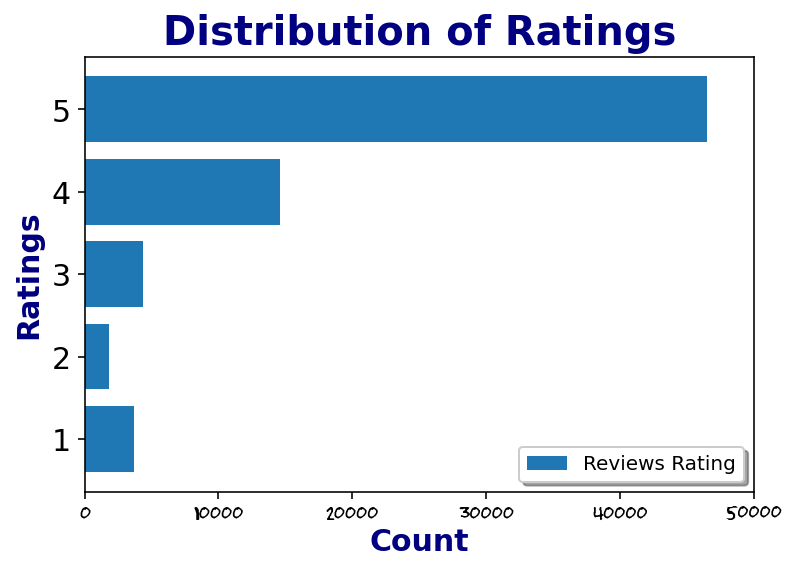

In [ ]:
x = list( df['reviews.rating'].value_counts().index )
y = list( df['reviews.rating'].value_counts() )
plt.barh(x, y)

ticks_x = np.linspace(0, 50000, 6)   
plt.xticks(ticks_x, fontsize=10, family='fantasy', color='black')
plt.yticks( size=15 )

plt.title('Distribution of Ratings', fontsize=20, weight='bold', color='navy', loc='center')
plt.xlabel('Count', fontsize=15, weight='bold', color='navy')
plt.ylabel('Ratings', fontsize=15, weight='bold', color='navy')
plt.legend(['Reviews Rating'], shadow=True, loc=4)

**Words used in Reviews**

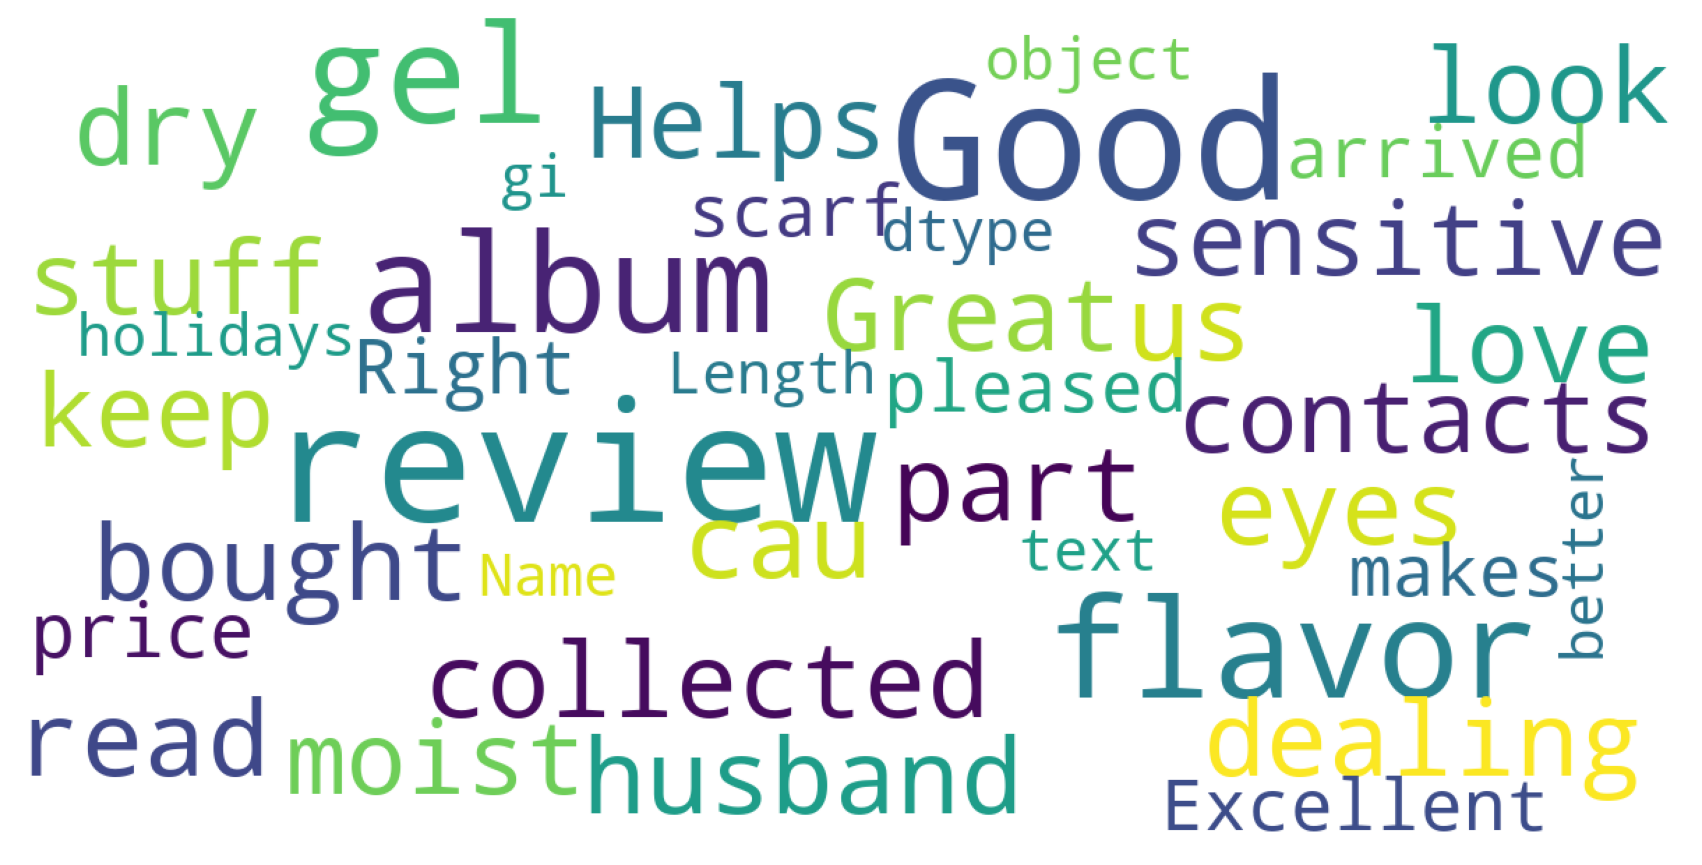

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['reviews.text'])

**Tokenizing individual words**

In [ ]:

split_title = []
listCounts = []
split_title = [x.split(" ") for x in df['reviews.title'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

In [ ]:
len(big_list)

232473

In [ ]:
split_title = []
listCounts = []
split_title = [x.split(" ") for x in df['reviews.text'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

In [ ]:
len(big_list)

2801005

In [ ]:
df['name'].value_counts()

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                                                       8606
The Secret Life Of Pets (4k/uhd + Blu-Ray + Digital)                                                            5510
Independence Day Resurgence (4k/uhd + Blu-Ray + Digital)                                                        3609
Tide Original Liquid Laundry Detergent - 100 Oz                                                                 3498
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                                                 3330
                                                                                                                ... 
Lucy's Sugar Cookies, 5.5oz                                                                                        1
99179 - Fit System 01-05 Civic Replacement Mirror Glass, Driver Side - check description for fitment details       1
Lundberg Long Grain Brown Organic Rice, 16oz                    

In [ ]:
df1 = df[df['reviews.didPurchase'] == True]
df1['name'].value_counts()

The Foodsaver174 10 Cup Fresh Container - Fac10-000                      477
Pantene Airspray Hairspray - 7 Oz                                        443
Hormel Chili, No Beans                                                    91
Coty Airspun Face Powder, Translucent Extra Coverage                      88
Just For Men Brush-In Color Gel For Mustache & Beard, Dark Brown M-45     80
                                                                        ... 
Queen Helene Cocoa Butter Solid                                            1
Roger Corman Sci Fi Classics (dvd)                                         1
Suave Professionals Hair Conditioner, Sleek                                1
Isoplus Neutralizing Shampoo                                               1
Mill Creek Aloe Vera & Paba Lotion                                         1
Name: name, Length: 304, dtype: int64

Popular purchased Product

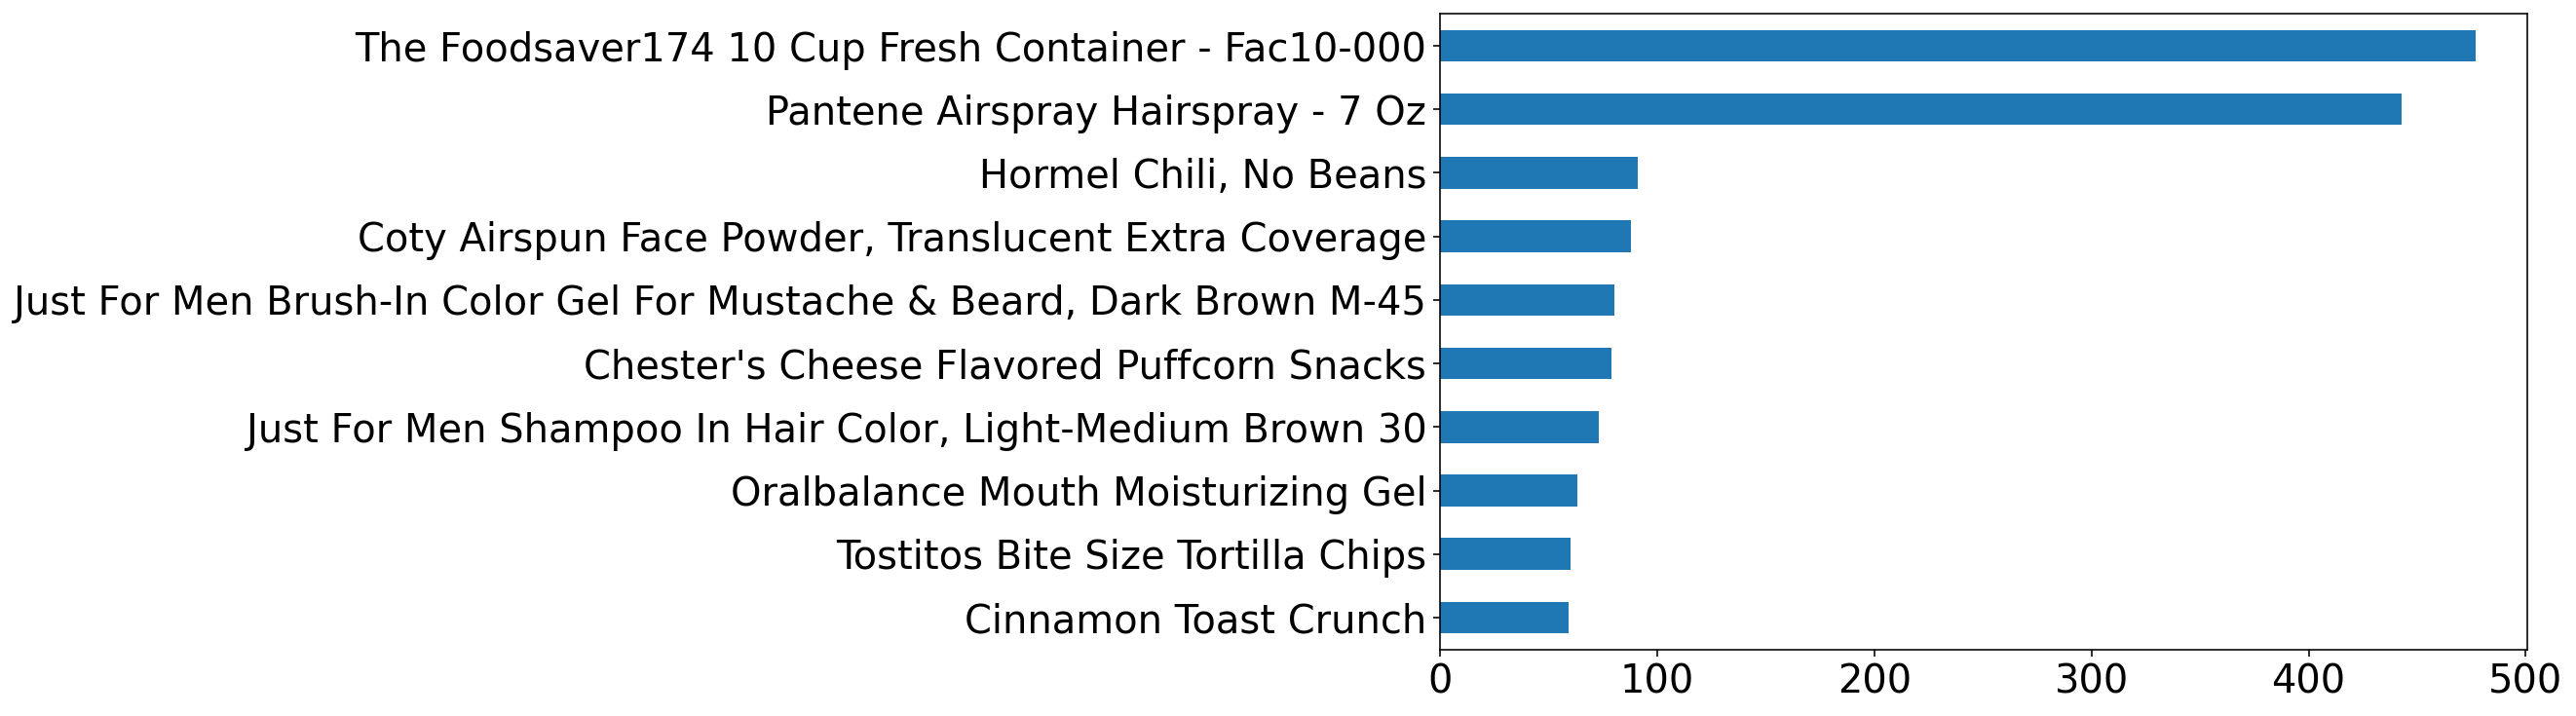

In [ ]:
df1['name'].value_counts()[0:10].plot(kind='barh', figsize=[10,6], fontsize=20).invert_yaxis()

In [ ]:
df1 = df1[df1['name'] == 'The Foodsaver174 10 Cup Fresh Container - Fac10-000']
df1 = df1[df1['reviews.rating']==5]

df1 = df1[[ 'reviews.rating', 'reviews.text']]
df1

,reviews.rating,reviews.text
46943,5,"I love the fact you can see what is inside, ea..."
46944,5,I have used my foodsaver container over and ov...
46945,5,I bought this set as well as the 10 cup contai...
46946,5,I have had a chance to use these for a while. ...
46947,5,My veggie's stayed good for two weeks! Overall...
...,...,...
47342,5,The best buy since we got our 3rd FoodSaver. H...
47343,5,All the FoodSaver products I have purchased ar...
47344,5,I've been using these containers since they we...
47345,5,"Haven't had a chance to use them yet, but I be..."


In [ ]:
df1.to_csv('Foodsaver_5.csv', index = False)

In [ ]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

all_text=df['reviews.text']
# train_text=df['reviews.text']
y=df['reviews.rating']

**n-gram tfidf Vectorizer**

In [ ]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 3) ) 
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(all_text)

In [ ]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(all_text)

train_features = hstack([train_char_features, train_word_features])

In [ ]:
import time   
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
seed = 71

X_train, X_test, y_train, y_test = train_test_split(train_features, y, test_size=0.3, random_state=seed)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (49705, 1346053)
y_train (49705,)
X_test (21303, 1346053)
y_test (21303,)


**Logistic Regression with K-fold Validation**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

In [ ]:


logit = LogisticRegression(C=1, multi_class='ovr')
logit.fit(X_train,y_train)
preds3 = logit.predict(X_test)

In [ ]:
print("Logistic Regression accuracy", accuracy_score(preds3, y_test))
print(classification_report(preds3, y_test))
print(confusion_matrix(preds3, y_test))

Logistic Regression accuracy 0.7327137022954513
              precision    recall  f1-score   support

           1       0.65      0.76      0.70       972
           2       0.08      0.75      0.14        56
           3       0.18      0.54      0.27       444
           4       0.26      0.51      0.34      2211
           5       0.96      0.76      0.85     17620

    accuracy                           0.73     21303
   macro avg       0.43      0.66      0.46     21303
weighted avg       0.86      0.73      0.78     21303

[[  734   126    59    30    23]
 [    8    42     4     1     1]
 [   32    61   240    86    25]
 [   47   112   457  1123   472]
 [  311   209   553  3077 13470]]
